In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm, trange
import seaborn as sns
import pickle

import src.metrics as metrics
import src.kernels as kernels
import src.bootstrap as boot
import src.exp_utils as exp_utils
import experiments.nf as nf_utils

Seed set to 42


Using device cpu


Seed set to 42
usage: ipykernel_launcher.py [-h] [--n N] [--nrep NREP] [--seed SEED]
ipykernel_launcher.py: error: unrecognized arguments: -f /home/clustor/ma/x/xl6116/.local/share/jupyter/runtime/kernel-3aa5df5b-4e0b-47d2-a8bd-c0936f6edad1.json


SystemExit: 2

/home/ma/x/xl6116/.envs/robust/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3516: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


# Exploration

In [ ]:
samples_res = pickle.load(open("../data/nf/samples_res.pkl", "rb"))
scores_res = pickle.load(open("../data/nf/scores_res.pkl", "rb"))

In [219]:
scores_res[5.].shape

(3, 784)

In [226]:
ss = samples_res[5.][0]
ss = torch.tensor(ss.reshape([1, 1, 28, 28]), dtype=torch.float64).requires_grad_(True)
log_px = flow_model._get_likelihood(ss, return_ll=True)
log_px.backward()
grad_log_px = ss.grad.detach().numpy().reshape([1, 28**2])

gg = scores_res[5.][0]

print(np.allclose(grad_log_px, gg))

False


In [221]:
gg

array([-1.63435912e+00, -7.27953732e-01, -5.66502392e-01, -1.28071964e+00,
       -6.15881681e-01, -2.27037830e+01, -2.59067020e+01,  1.47285873e+02,
       -2.50929928e+01,  1.83902496e+02, -2.40778542e+01, -3.50008163e+01,
       -2.70649090e+01, -3.56064644e+01, -2.81138229e+01, -3.87921066e+01,
       -1.25992143e+00, -3.36757889e+01, -2.58436108e+01, -4.13030167e+01,
       -2.59001369e+01, -2.94358578e+01,  4.61087837e+01, -3.69864883e+01,
       -2.34267902e+01, -4.05659332e+01, -2.43858051e+01, -2.46120644e+01,
        1.56939313e-01, -2.00292636e-02,  3.73690426e-01, -8.47651809e-02,
        1.29358619e-01, -1.08112926e+01, -5.52713737e+01, -7.34531641e+00,
       -3.52323418e+01, -2.28310146e+01, -2.50636978e+01, -2.65410252e+01,
       -3.79056931e+01,  2.43168964e+01, -2.50997314e+01, -7.98819733e+00,
       -1.91448536e+01, -2.02958794e+01, -1.76184063e+01,  3.49340844e+00,
       -2.73763943e+01, -3.14777889e+01,  3.13722630e+01, -1.44404697e+01,
        2.87813416e+02, -

In [212]:
gg

array([-1.63435912e+00, -7.27953732e-01, -5.66502392e-01, -1.28071964e+00,
       -6.15881681e-01, -2.27037830e+01, -2.59067020e+01,  1.47285873e+02,
       -2.50929928e+01,  1.83902496e+02, -2.40778542e+01, -3.50008163e+01,
       -2.70649090e+01, -3.56064644e+01, -2.81138229e+01, -3.87921066e+01,
       -1.25992143e+00, -3.36757889e+01, -2.58436108e+01, -4.13030167e+01,
       -2.59001369e+01, -2.94358578e+01,  4.61087837e+01, -3.69864883e+01,
       -2.34267902e+01, -4.05659332e+01, -2.43858051e+01, -2.46120644e+01,
        1.56939313e-01, -2.00292636e-02,  3.73690426e-01, -8.47651809e-02,
        1.29358619e-01, -1.08112926e+01, -5.52713737e+01, -7.34531641e+00,
       -3.52323418e+01, -2.28310146e+01, -2.50636978e+01, -2.65410252e+01,
       -3.79056931e+01,  2.43168964e+01, -2.50997314e+01, -7.98819733e+00,
       -1.91448536e+01, -2.02958794e+01, -1.76184063e+01,  3.49340844e+00,
       -2.73763943e+01, -3.14777889e+01,  3.13722630e+01, -1.44404697e+01,
        2.87813416e+02, -

In [228]:
grad_log_px

array([[-1.65945756e+00, -7.60457218e-01, -3.14714849e-01,
        -2.68949509e+00, -2.12996006e+00,  8.24991989e+01,
        -2.27444038e+01,  1.20152435e+02, -2.35301018e+01,
        -3.56453819e+01, -2.84642353e+01, -2.84418716e+01,
        -2.05259762e+01, -2.35595703e+01, -2.85520382e+01,
        -2.73892574e+01, -2.23792572e+01,  4.06904488e+01,
        -2.38104038e+01, -3.80589561e+01, -2.51096916e+01,
         6.25553284e+01, -1.42705173e+01,  1.34398819e+02,
        -1.51885080e+01, -3.33577766e+01, -3.01672897e+01,
        -1.47614059e+01,  2.47536838e-01, -1.17415907e-02,
         3.63592297e-01, -7.48175755e-02,  1.30525947e-01,
        -1.31798763e+01, -4.43387566e+01, -3.45325813e+01,
        -3.72664871e+01, -2.03994656e+01, -4.32588310e+01,
        -2.10528889e+01, -3.98037186e+01,  5.20031691e+00,
         9.26136627e+01, -3.13165569e+01, -3.51080170e+01,
        -3.24680481e+01, -2.87148933e+01, -2.90717106e+01,
        -3.44408150e+01, -1.49494982e+01,  1.19609327e+0

In [211]:
grad_log_px

array([[-1.31774187e+00, -6.10866368e-01, -1.78693369e-01,
        -5.81925154e-01, -3.56113225e-01, -3.94478493e+01,
        -2.01207294e+01,  4.40199188e+02, -2.41298847e+01,
         1.70624985e+02,  5.43263550e+01, -1.73049374e+01,
        -1.97921429e+01, -2.86553478e+01, -2.20909252e+01,
         5.81550884e+00, -2.98598385e+01, -3.18936100e+01,
        -2.06554813e+01, -4.47615814e+01, -2.25664730e+01,
        -1.00404558e+01, -1.99210529e+01, -3.86245489e+00,
        -2.15992565e+01, -3.72775192e+01, -2.75406551e+01,
        -2.02716522e+01,  1.94136456e-01, -1.82477757e-04,
         2.89462507e-01, -7.56782293e-02,  1.15298390e-01,
        -3.02061772e+00, -4.29426651e+01, -2.50369301e+01,
        -4.35875664e+01, -1.66724377e+01,  4.83073006e+01,
        -2.96438179e+01, -3.05018806e+01,  9.15559006e+00,
         2.45175186e+02, -3.04296951e+01, -2.34440689e+01,
        -2.56326904e+01, -3.65511398e+01,  1.25517563e+02,
         1.85717831e+01, -2.91901817e+01, -1.28387432e+0

# Load

In [80]:
samples_res = pickle.load(open("../data/nf/samples_res_n1000.pkl", "rb"))
scores_res = pickle.load(open("../data/nf/scores_res_n1000.pkl", "rb"))

# samples_res = pickle.load(open("../data/nf/samples_res_n3_seed2.pkl", "rb"))
# scores_res = pickle.load(open("../data/nf/scores_res_n3_seed2.pkl", "rb"))

In [81]:
flow_model, _ = nf_utils.train_flow(nf_utils.create_multiscale_flow(), model_name="MNISTFlow_multiscale")

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Found pretrained model, loading...


std: 0.0


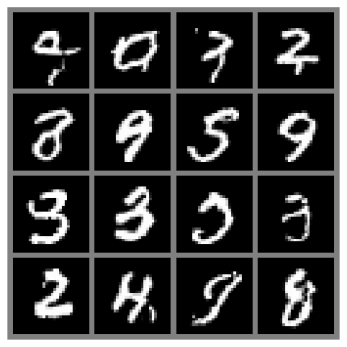

std: 1.0


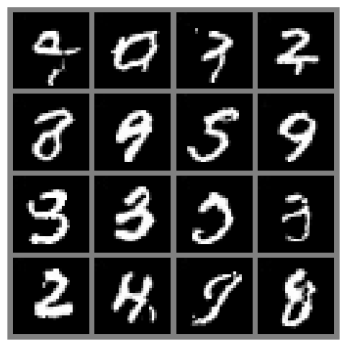

std: 5.0


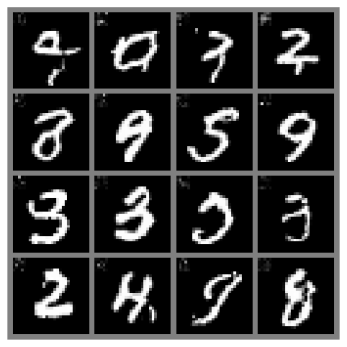

std: 10.0


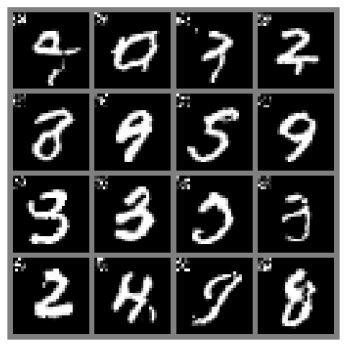

std: 20.0


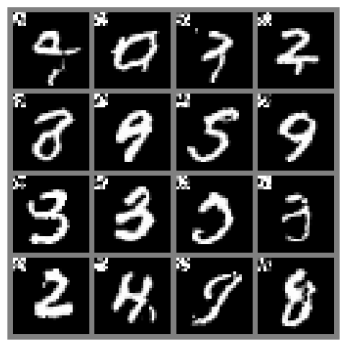

std: 50.0


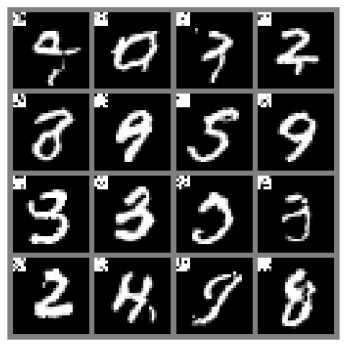

std: 100.0


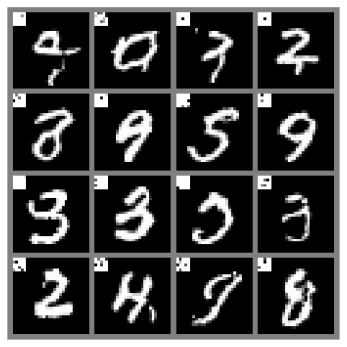

In [82]:
for std in samples_res.keys():
    print("std:", std)
    nf_utils.show_imgs(torch.tensor(samples_res[std][:16].reshape([-1, 1, 28, 28]), dtype=torch.int32))

In [92]:
xx = samples_res[0.][0]
xx = torch.tensor(xx, dtype=torch.float64).requires_grad_(True)

yy = scores_res[0.][0]
yy = torch.tensor(yy, dtype=torch.float64).requires_grad_(True)

pl.seed_everything(2024)
# this might take ~20mins
hes = torch.autograd.functional.hessian(lambda x: flow_model._get_likelihood(x.reshape([1, 1, 28, 28]), return_ll=True), xx)

Seed set to 2024


In [94]:
hes.shape

torch.Size([784, 784])

In [97]:
pl.seed_everything(2024)
hes_vec = torch.autograd.functional.hvp(lambda x: flow_model._get_likelihood(x.reshape([1, 1, 28, 28]), return_ll=True), xx, yy)

Seed set to 2024


In [98]:
hes_vec[0], hes_vec[1].shape

(tensor([-643.8462]), torch.Size([784]))

In [ ]:
torch.allclose(torch.linalg.matmul(hes, yy), hes_vec[1], rtol=1e-4)

In [108]:
b = 1.
2 * b * torch.sum(hes_vec[1]**2)**0.5 * (1 + torch.sum(yy**2))**(- b - 1)

tensor(8.2029e-06, dtype=torch.float64, grad_fn=<MulBackward0>)

In [160]:
pl.seed_everything(2024)

xx = samples_res[0.][0]
xx = torch.tensor(xx, dtype=torch.float64).requires_grad_(True)

def compute_grad(xx):
    log_px = flow_model._get_likelihood(xx.reshape([1, 1, 28, 28]), return_ll=True)
    # log_px.backward()
    # grad_log_px = xx.grad.reshape((28**2,))
    grad_log_px = torch.autograd.grad([log_px], [xx], retain_graph=True)
    return grad_log_px, log_px

Seed set to 2024


In [161]:
pl.seed_everything(2024)
grad_xx, log_pxx = compute_grad(xx)
# pl.seed_everything(2024)
# hess_xx = torch.autograd.functional.hessian(lambda x: compute_grad(x)[0][0], xx)

Seed set to 2024


In [165]:
xx = samples_res[0.][0]
xx = torch.tensor(xx, dtype=torch.float64).requires_grad_(True)

pl.seed_everything(2024)
log_px = flow_model._get_likelihood(xx.reshape([1, 1, 28, 28]), return_ll=True)
print(log_px)

# grad_log_px = torch.autograd.grad([log_px], [xx])

pl.seed_everything(10)
grad_log_px2 = torch.autograd.grad([log_px], [xx])

Seed set to 2024


tensor([-643.8462], grad_fn=<AddBackward0>)


Seed set to 10


In [164]:
grad_log_px

(tensor([-2.6694e+01, -4.2400e+01, -1.2384e+01,  2.2787e+02,  1.2623e+00,
         -3.2318e+01, -1.1071e+01, -3.9934e+01, -2.6119e+01, -3.4600e+01,
         -2.6144e+00, -3.4041e+01,  1.6537e+00, -3.7967e+01, -1.7085e+01,
         -3.3689e+01, -2.7713e+01, -4.2988e+01, -2.4359e+01, -3.2085e+01,
         -1.8820e+01, -3.3554e+01, -2.6126e+01, -3.1347e+01, -1.3406e+01,
         -3.6581e+01, -1.3476e+01, -2.3365e+01, -1.8183e+01,  1.3000e+02,
         -2.7858e+01, -6.2087e+00, -3.5100e+01, -3.1678e+01, -4.2963e+01,
         -2.0396e+01, -2.8959e+01,  2.8744e+01,  5.0248e+01, -2.5236e+01,
          2.2836e+02, -1.1789e+01,  2.4982e+01, -2.9353e+01, -2.2001e+01,
         -6.7391e+00, -1.8817e+01, -2.1735e+01, -3.4401e+01, -1.0807e+01,
         -4.2187e+01,  5.4839e+00, -1.6872e+01, -2.9715e+01, -7.8770e+00,
         -1.5892e+01, -1.5749e+01, -4.1385e+01, -3.2007e+01, -3.5117e+01,
          1.2203e+02, -2.2976e+01, -1.8674e+01,  7.3838e+01,  3.5064e+00,
         -4.1672e+01,  3.7730e+01, -3.

In [168]:
torch.allclose(grad_log_px[0], grad_log_px2[0])

True

In [256]:
# check if grad computation is vectorisable
pl.seed_everything(2024)

xx = samples_res[0.][0]
xx_ls = [torch.tensor(xx, dtype=torch.float64).requires_grad_(True) for _ in range(2)]

log_px_ls = []
for xx in xx_ls:
    pl.seed_everything(2024)
    log_px = flow_model._get_likelihood(xx.reshape([-1, 1, 28, 28]), return_ll=True)

    # xx = xx.detach().requires_grad_(True)
    pl.seed_everything(2024)
    log_px2, hes_vec = torch.autograd.functional.hvp(lambda x: flow_model._get_likelihood(x.reshape([-1, 1, 28, 28]), return_ll=True), xx, yy)

    assert torch.allclose(log_px, log_px2)
    log_px_ls.append(log_px)

grad_log_px = torch.autograd.grad(log_px_ls, xx_ls, retain_graph=True)

Seed set to 2024
Seed set to 2024
Seed set to 2024
Seed set to 2024
Seed set to 2024


In [257]:
torch.allclose(grad_log_px[0], grad_log_px[1])

True

In [258]:
# check grad is the same so long as log_px is the same
grad_log_px2 = torch.autograd.grad(log_px_ls, xx_ls)

In [259]:
torch.allclose(grad_log_px[0], grad_log_px2[0])

True

In [260]:
torch.allclose(grad_log_px[0], grad_log_px[1])

True

In [261]:
grad_log_px[0]

tensor([-2.6694e+01, -4.2400e+01, -1.2384e+01,  2.2787e+02,  1.2623e+00,
        -3.2318e+01, -1.1071e+01, -3.9934e+01, -2.6119e+01, -3.4600e+01,
        -2.6144e+00, -3.4041e+01,  1.6537e+00, -3.7967e+01, -1.7085e+01,
        -3.3689e+01, -2.7713e+01, -4.2988e+01, -2.4359e+01, -3.2085e+01,
        -1.8820e+01, -3.3554e+01, -2.6126e+01, -3.1347e+01, -1.3406e+01,
        -3.6581e+01, -1.3476e+01, -2.3365e+01, -1.8183e+01,  1.3000e+02,
        -2.7858e+01, -6.2087e+00, -3.5100e+01, -3.1678e+01, -4.2963e+01,
        -2.0396e+01, -2.8959e+01,  2.8744e+01,  5.0248e+01, -2.5236e+01,
         2.2836e+02, -1.1789e+01,  2.4982e+01, -2.9353e+01, -2.2001e+01,
        -6.7391e+00, -1.8817e+01, -2.1735e+01, -3.4401e+01, -1.0807e+01,
        -4.2187e+01,  5.4839e+00, -1.6872e+01, -2.9715e+01, -7.8770e+00,
        -1.5892e+01, -1.5749e+01, -4.1385e+01, -3.2007e+01, -3.5117e+01,
         1.2203e+02, -2.2976e+01, -1.8674e+01,  7.3838e+01,  3.5064e+00,
        -4.1672e+01,  3.7730e+01, -3.6533e+01, -3.1

In [198]:
import functorch

def hvp(f, primals, tangents):
  return functorch.jvp(functorch.grad(f), primals, tangents)

In [244]:
xx = samples_res[0.][0]
xx = torch.tensor(xx, dtype=torch.float64).requires_grad_(True)

yy = scores_res[0.][0]
yy = torch.tensor(yy, dtype=torch.float64).requires_grad_(True)

pl.seed_everything(2024)
hes_vec2 = hvp(lambda x: flow_model._get_likelihood(x.reshape([-1, 1, 28, 28]), return_ll=True).squeeze(), (xx,), (yy,))
# functorch.grad(lambda x: flow_model._get_likelihood(x.reshape([1, 1, 28, 28]), return_ll=True).squeeze())(xx)

Seed set to 2024


In [234]:
hes_vec2

(tensor([-2.6694e+01, -4.2400e+01, -1.2384e+01,  2.2787e+02,  1.2623e+00,
         -3.2318e+01, -1.1071e+01, -3.9934e+01, -2.6119e+01, -3.4600e+01,
         -2.6144e+00, -3.4041e+01,  1.6537e+00, -3.7967e+01, -1.7085e+01,
         -3.3689e+01, -2.7713e+01, -4.2988e+01, -2.4359e+01, -3.2085e+01,
         -1.8820e+01, -3.3554e+01, -2.6126e+01, -3.1347e+01, -1.3406e+01,
         -3.6581e+01, -1.3476e+01, -2.3365e+01, -1.8183e+01,  1.3000e+02,
         -2.7858e+01, -6.2087e+00, -3.5100e+01, -3.1678e+01, -4.2963e+01,
         -2.0396e+01, -2.8959e+01,  2.8744e+01,  5.0248e+01, -2.5236e+01,
          2.2836e+02, -1.1789e+01,  2.4982e+01, -2.9353e+01, -2.2001e+01,
         -6.7391e+00, -1.8817e+01, -2.1735e+01, -3.4401e+01, -1.0807e+01,
         -4.2187e+01,  5.4839e+00, -1.6872e+01, -2.9715e+01, -7.8770e+00,
         -1.5892e+01, -1.5749e+01, -4.1385e+01, -3.2007e+01, -3.5117e+01,
          1.2203e+02, -2.2976e+01, -1.8674e+01,  7.3838e+01,  3.5064e+00,
         -4.1672e+01,  3.7730e+01, -3.

In [237]:
xx = samples_res[0.][0]
xx = torch.tensor(xx, dtype=torch.float64).requires_grad_(True)

yy = scores_res[0.][0]
yy = torch.tensor(yy, dtype=torch.float64).requires_grad_(True)

pl.seed_everything(2024)
hes_vec = torch.autograd.functional.hvp(lambda x: flow_model._get_likelihood(x.reshape([-1, 1, 28, 28]), return_ll=True), xx, yy)
hes_vec

Seed set to 2024


(tensor([-643.8462]),
 tensor([ 1.9905e+03,  2.6021e+04,  7.8457e+02,  2.3221e+06,  1.6199e+05,
          4.8884e+04,  7.1676e+04,  1.5249e+04,  1.0109e+04,  1.5072e+04,
          1.4743e+05,  1.8777e+04,  1.7350e+05,  4.1375e+04, -3.0859e+03,
          1.0375e+04,  1.2305e+04, -3.6733e+04, -1.5203e+03, -7.3693e+03,
         -5.5322e+03,  1.7059e+04, -7.1602e+03,  1.6147e+04,  6.3738e+04,
         -4.3874e+04, -1.0372e+04, -4.7230e+03,  9.2258e+03,  6.6493e+05,
         -1.2874e+05,  1.2028e+05, -6.7166e+04, -5.0767e+03,  6.7516e+03,
          3.6578e+04,  9.2233e+04,  3.1051e+04, -3.3030e+06, -4.9724e+04,
          2.4496e+06,  3.8300e+04, -1.3792e+06, -1.2768e+04,  5.3373e+03,
         -1.4675e+05,  1.6300e+05, -9.3094e+01,  1.8735e+04,  7.1046e+04,
         -1.0113e+04, -4.5415e+04,  1.6988e+05, -2.1135e+03, -2.1227e+05,
          3.1290e+04,  1.1517e+02,  1.2082e+03, -1.4701e+02, -5.0123e+03,
         -3.1572e+06,  1.2973e+05,  2.4191e+04,  7.4599e+05,  1.3335e+05,
          5.6883

In [241]:
torch.allclose(hes_vec[1], hes_vec2[1], rtol=1e-4)

True

#### batch hvp

In [265]:
xx = samples_res[0.][0]
xx = torch.tensor(xx, dtype=torch.float64).requires_grad_(True)

yy = scores_res[0.][0]
yy = torch.tensor(yy, dtype=torch.float64)

pl.seed_everything(2024)
# hes_vec2 = hvp(lambda x: flow_model._get_likelihood(x.reshape([-1, 1, 28, 28]), return_ll=True).squeeze(), (xx, xx), (yy, yy))


Seed set to 2024


2024

# Test

In [11]:
n = 500
seed_ls = [0, 9, 18, 27, 36]
std_ls = [0., 1., 5., 10., 20., 50., 100.]

samples_res = {s: [] for s in std_ls}
scores_res = {s: [] for s in std_ls}
hvp_res = {s: [] for s in std_ls}
# hvp_res = {s: np.empty([len(seed_ls)*2, n, 28**2) for s in std_ls}
for s in seed_ls:
    samples_res_sub = pickle.load(open(f"../data/nf/samples_res_n{n}_seed{s}.pkl", "rb"))
    scores_res_sub = pickle.load(open(f"../data/nf/scores_res_n{n}_seed{s}.pkl", "rb"))
    hvp_res_sub = pickle.load(open(f"../data/nf/hvp_res_n{n}_seed{s}.pkl", "rb"))

    for std in std_ls:
        samples_res[std].append(samples_res_sub[std])
        scores_res[std].append(scores_res_sub[std])
        hvp_res[std].append(hvp_res_sub[std])

for std in std_ls:
    samples_res[std] = np.concatenate(samples_res[std], 0)
    scores_res[std] = np.concatenate(scores_res[std], 0)
    hvp_res[std] = np.concatenate(hvp_res[std], 0)
    

In [83]:
n = 200
std = 20.
X = samples_res[std][:n]
scores_X = scores_res[std][:n]
kernel0 = kernels.RBF(sigma_sq=None, med_heuristic=True, X=X, Y=X)
kernel = kernels.TiltedKernel(kernel=kernel0, weight_fn=score_weight_fn)

ksd = metrics.KSD(kernel)
wild_boot = boot.WildBootstrap(ksd)
pval, stat, boot_stats = wild_boot.pval(X, X, return_stat=True, return_boot=True, scores=scores_X)

In [84]:
pval

Array(0.000999, dtype=float32, weak_type=True)

In [36]:
# std = 0
n_exp = 500

res = {"rbf": []}
for std in std_ls:
    res_sub = exp_utils.run_tests(
        samples=samples_res[std][:, :n_exp], 
        scores=scores_res[std][:, :n_exp],
        hvps=hvp_res[std][:, :n_exp],
        theta=0.1,
        bw="med",
        verbose=True,
    )
    res["rbf"].append(res_sub["rbf"])

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:38<00:00,  3.89s/it]


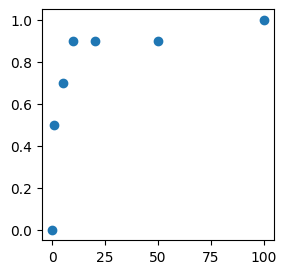

In [35]:
# n = 200
res_rej = [np.mean(rr["rej"]) for rr in res["rbf"]]

_, ax = plt.subplots(figsize=(3, 3))
ax.scatter(std_ls, res_rej)


In [40]:
res["rbf"][0]["rej"]

[0, 1, 0, 1, 0, 1, 1, 0, 1, 0]

(-0.05, 1.05)

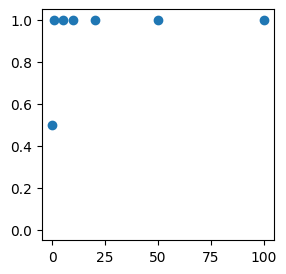

In [39]:
# n = 500
res_rej = [np.mean(rr["rej"]) for rr in res["rbf"]]

_, ax = plt.subplots(figsize=(3, 3))
ax.scatter(std_ls, res_rej)
ax.set_ylim(-0.05, 1.05)

In [43]:
samples = np.load("../data/nf_ksdagg/testing/X_mnist_level.npy")
scores = np.load("../data/nf_ksdagg/testing/score_X_mnist_level.npy")

In [44]:
samples.shape

(200, 500, 784)

In [56]:
n_exp = 500
res_ksdagg = exp_utils.run_tests(
    samples=samples[:10, :n_exp], 
    scores=scores[:10, :n_exp],
    hvps=None,
    theta=0.1,
    # bw="med",
    bw=1,
    verbose=True,
)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:37<00:00,  3.79s/it]


In [70]:
np.mean(res_ksdagg["rbf"]["stat"][4] > np.array(res_ksdagg["rbf"]["stat"]))

Array(0.6, dtype=float32)

In [50]:
res_ksdagg["rbf"]["rej"]

[1, 1, 1, 1, 1, 0, 1, 0, 1, 1]

In [55]:
res_ksdagg["rbf"]["pval"]

[Array(0.002997, dtype=float32, weak_type=True),
 Array(0.000999, dtype=float32, weak_type=True),
 Array(0.01498501, dtype=float32, weak_type=True),
 Array(0.06293707, dtype=float32, weak_type=True),
 Array(0.00599401, dtype=float32, weak_type=True),
 Array(0.28671327, dtype=float32, weak_type=True),
 Array(0.000999, dtype=float32, weak_type=True),
 Array(0.0999001, dtype=float32, weak_type=True),
 Array(0.000999, dtype=float32, weak_type=True),
 Array(0.04095904, dtype=float32, weak_type=True)]